In [ ]:
 
import imageio
import cv2
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Conv2DTranspose
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import keras
from tensorflow.keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D, BatchNormalization, Activation, Concatenate, Add
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.callbacks import Callback
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')


def cnn_model(img,fimg):
   
#Branch 1 from input raw image
    #Encoding Layers with skip connections
    #Encoder block 1
    conv_11 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(img)
    conv_12 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(conv_11)
    concat11 = tf.keras.layers.Concatenate()([conv_11,conv_12]) 
    conv_13 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(concat11)
    concat12 = tf.keras.layers.Concatenate()([conv_11,conv_12,conv_13]) 
    conv_14 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(concat12)
    concat13 = tf.keras.layers.Concatenate()([conv_11,conv_12,conv_13,conv_14])
    conv_10 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(concat13)
    conv_10 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding="same")(conv_10)

    #Encoder block 2
    conv_21 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(conv_10)
    conv_22 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(conv_21)
    concat21 = tf.keras.layers.Concatenate()([conv_21,conv_22]) 
    conv_23 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(concat21)
    concat22 = tf.keras.layers.Concatenate()([conv_21,conv_22,conv_23]) 
    conv_24 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(concat22)
    concat23 = tf.keras.layers.Concatenate()([conv_21,conv_22,conv_23,conv_24])
    conv_20 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(concat23)
    conv_20 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding="same")(conv_20)

    #Encoder block 3
    conv_31 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(conv_20)
    conv_32 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(conv_31)
    concat31 = tf.keras.layers.Concatenate()([conv_31,conv_32]) 
    conv_33 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(concat31)
    concat32 = tf.keras.layers.Concatenate()([conv_31,conv_32,conv_33]) 
    conv_34 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(concat32)
    concat33 = tf.keras.layers.Concatenate()([conv_31,conv_32,conv_33,conv_34])
    conv_30 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(concat33)
    conv_30 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding="same")(conv_30)

    #Decoding Layers with skip connections
    #Decoder block 1
    deconv_11 = Conv2DTranspose(32,(3,3),padding='same',strides=1)(conv_30)
    deconv_12 = Conv2DTranspose(32,(3,3),padding='same',strides=1)(deconv_11)
    concat_11 = tf.keras.layers.Concatenate()([deconv_11,deconv_12]) 
    deconv_13 = Conv2DTranspose(32,(3,3),padding='same',strides=1)(concat_11)
    concat_12 = tf.keras.layers.Concatenate()([deconv_11,deconv_12,deconv_13]) 
    deconv_14 = Conv2DTranspose(32,(3,3),padding='same',strides=1)(concat_12)
    concat_13 = tf.keras.layers.Concatenate()([deconv_11,deconv_12,deconv_13,deconv_14])
    deconv_10 = Conv2DTranspose(32,(3,3),padding='same',strides=1)(concat_13)
    
    #element wise addition with encoder 2
    Skip_add_1 = tf.keras.layers.Concatenate()([deconv_10, conv_20])
    

    #Decoder block 2
    deconv_21 = Conv2DTranspose(32,(3,3),padding='same',strides=1)(Skip_add_1)
    deconv_22 = Conv2DTranspose(32,(3,3),padding='same',strides=1)(deconv_21)
    concat_21 = tf.keras.layers.Concatenate()([deconv_21,deconv_22]) 
    deconv_23 = Conv2DTranspose(32,(3,3),padding='same',strides=1)(concat_21)
    concat_22 = tf.keras.layers.Concatenate()([deconv_21,deconv_22,deconv_23]) 
    deconv_24 = Conv2DTranspose(32,(3,3),padding='same',strides=1)(concat_22)
    concat_23 = tf.keras.layers.Concatenate()([deconv_21,deconv_22,deconv_23,deconv_24])
    deconv_20 = Conv2DTranspose(32,(3,3),padding='same',strides=1)(concat_23)

    #elementwise addition with encoder 1
    Skip_add_2 = tf.keras.layers.Concatenate()([deconv_20,conv_10])

    #Decoder block 3
    deconv_31 = Conv2DTranspose(16,(3,3),padding='same',strides=1)(Skip_add_2)
    deconv_32 = Conv2DTranspose(16,(3,3),padding='same',strides=1)(deconv_31)
    concat_31 = tf.keras.layers.Concatenate()([deconv_31,deconv_32]) 
    deconv_33 = Conv2DTranspose(16,(3,3),padding='same',strides=1)(concat_31)
    concat_32 = tf.keras.layers.Concatenate()([deconv_31,deconv_32,deconv_33]) 
    deconv_34 = Conv2DTranspose(16,(3,3),padding='same',strides=1)(concat_32)
    concat_33 = tf.keras.layers.Concatenate()([deconv_31,deconv_32,deconv_33,deconv_34])
    deconv_30 = Conv2DTranspose(32,(3,3),padding='same',strides=1)(concat_33)
    
#Second Branch input is filtered image(Weighted median filter)
    #Block 1
    convb1_1 = Conv2D(16, (3, 3), padding='same', strides=1)(fimg)
    convb1_b1 = BatchNormalization()(convb1_1)
    convb1_a1 = Activation('relu')(convb1_b1)
    convb1_2 = Conv2D(16, (3, 3), padding='same', strides=1)(convb1_a1)
    concatb1_c1 = Concatenate()([convb1_1,convb1_2])
    convb1_b2 = BatchNormalization()(concatb1_c1)
    convb1_a2 = Activation('relu')(convb1_b2)
    convb1_3 = Conv2D(16, (3, 3), padding='same', strides=1)(convb1_a2)
    concatb1_c2 = Concatenate()([concatb1_c1,convb1_3])
    convb1_b3 = BatchNormalization()(concatb1_c2)
    convb1_a3 = Activation('relu')(convb1_b3)
    convb1_4 = Conv2D(16, (3, 3), padding='same', strides=1)(convb1_a3)
    concatb1_c3 = Concatenate()([concatb1_c2,convb1_4])
    convb1_b4 = BatchNormalization()(concatb1_c3)
    convb1_a4 = Activation('relu')(convb1_b4)
    convb1_5 = Conv2D(16, (3, 3), padding='same', strides=1)(convb1_a4)

    cat1 = tf.keras.layers.Concatenate()([convb1_5,fimg])

    #Block 2
    convb2_1 = Conv2D(16, (3, 3), padding='same', strides=1)(cat1)
    convb2_b1 = BatchNormalization()(convb2_1)
    convb2_a1 = Activation('relu')(convb2_b1)
    convb2_2 = Conv2D(16, (3, 3), padding='same', strides=1)(convb2_a1)
    concatb2_c1 = Concatenate()([convb2_1,convb2_2])
    convb2_b2 = BatchNormalization()(concatb2_c1)
    convb2_a2 = Activation('relu')(convb2_b2)
    convb2_3 = Conv2D(16, (3, 3), padding='same', strides=1)(convb2_a2)
    concatb2_c2 = Concatenate()([concatb2_c1,convb2_3])
    convb2_b3 = BatchNormalization()(concatb2_c2)
    convb2_a3 = Activation('relu')(convb2_b3)
    convb2_4 = Conv2D(16, (3, 3), padding='same', strides=1)(convb2_a3)
    concatb2_c3 = Concatenate()([concatb2_c2,convb2_4])
    convb2_b4 = BatchNormalization()(concatb2_c3)
    convb2_a4 = Activation('relu')(convb2_b4)
    convb2_5 = Conv2D(16, (3, 3), padding='same', strides=1)(convb2_a4)

    cat2 = tf.keras.layers.Concatenate()([convb2_5,fimg,cat1])
    cat2 = Conv2D(32, (3, 3), padding='same', strides=1)(cat2)

    #elementwise addition with encoder 1
    add_n = tf.keras.layers.Add()([deconv_30,cat2])
    add_n = Activation('relu')(add_n)

    #convolutional layer to get an output image
    conv_n = Conv2D(3, (3, 3), activation='relu', padding='same', strides=1)(add_n)

    return conv_n

Mounted at /content/drive


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_27 (Conv2D)             (None, 224, 224, 32  896         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_28 (Conv2D)             (None, 224, 224, 32  9248        ['conv2d_27[0][0]']              
                                )                                                           

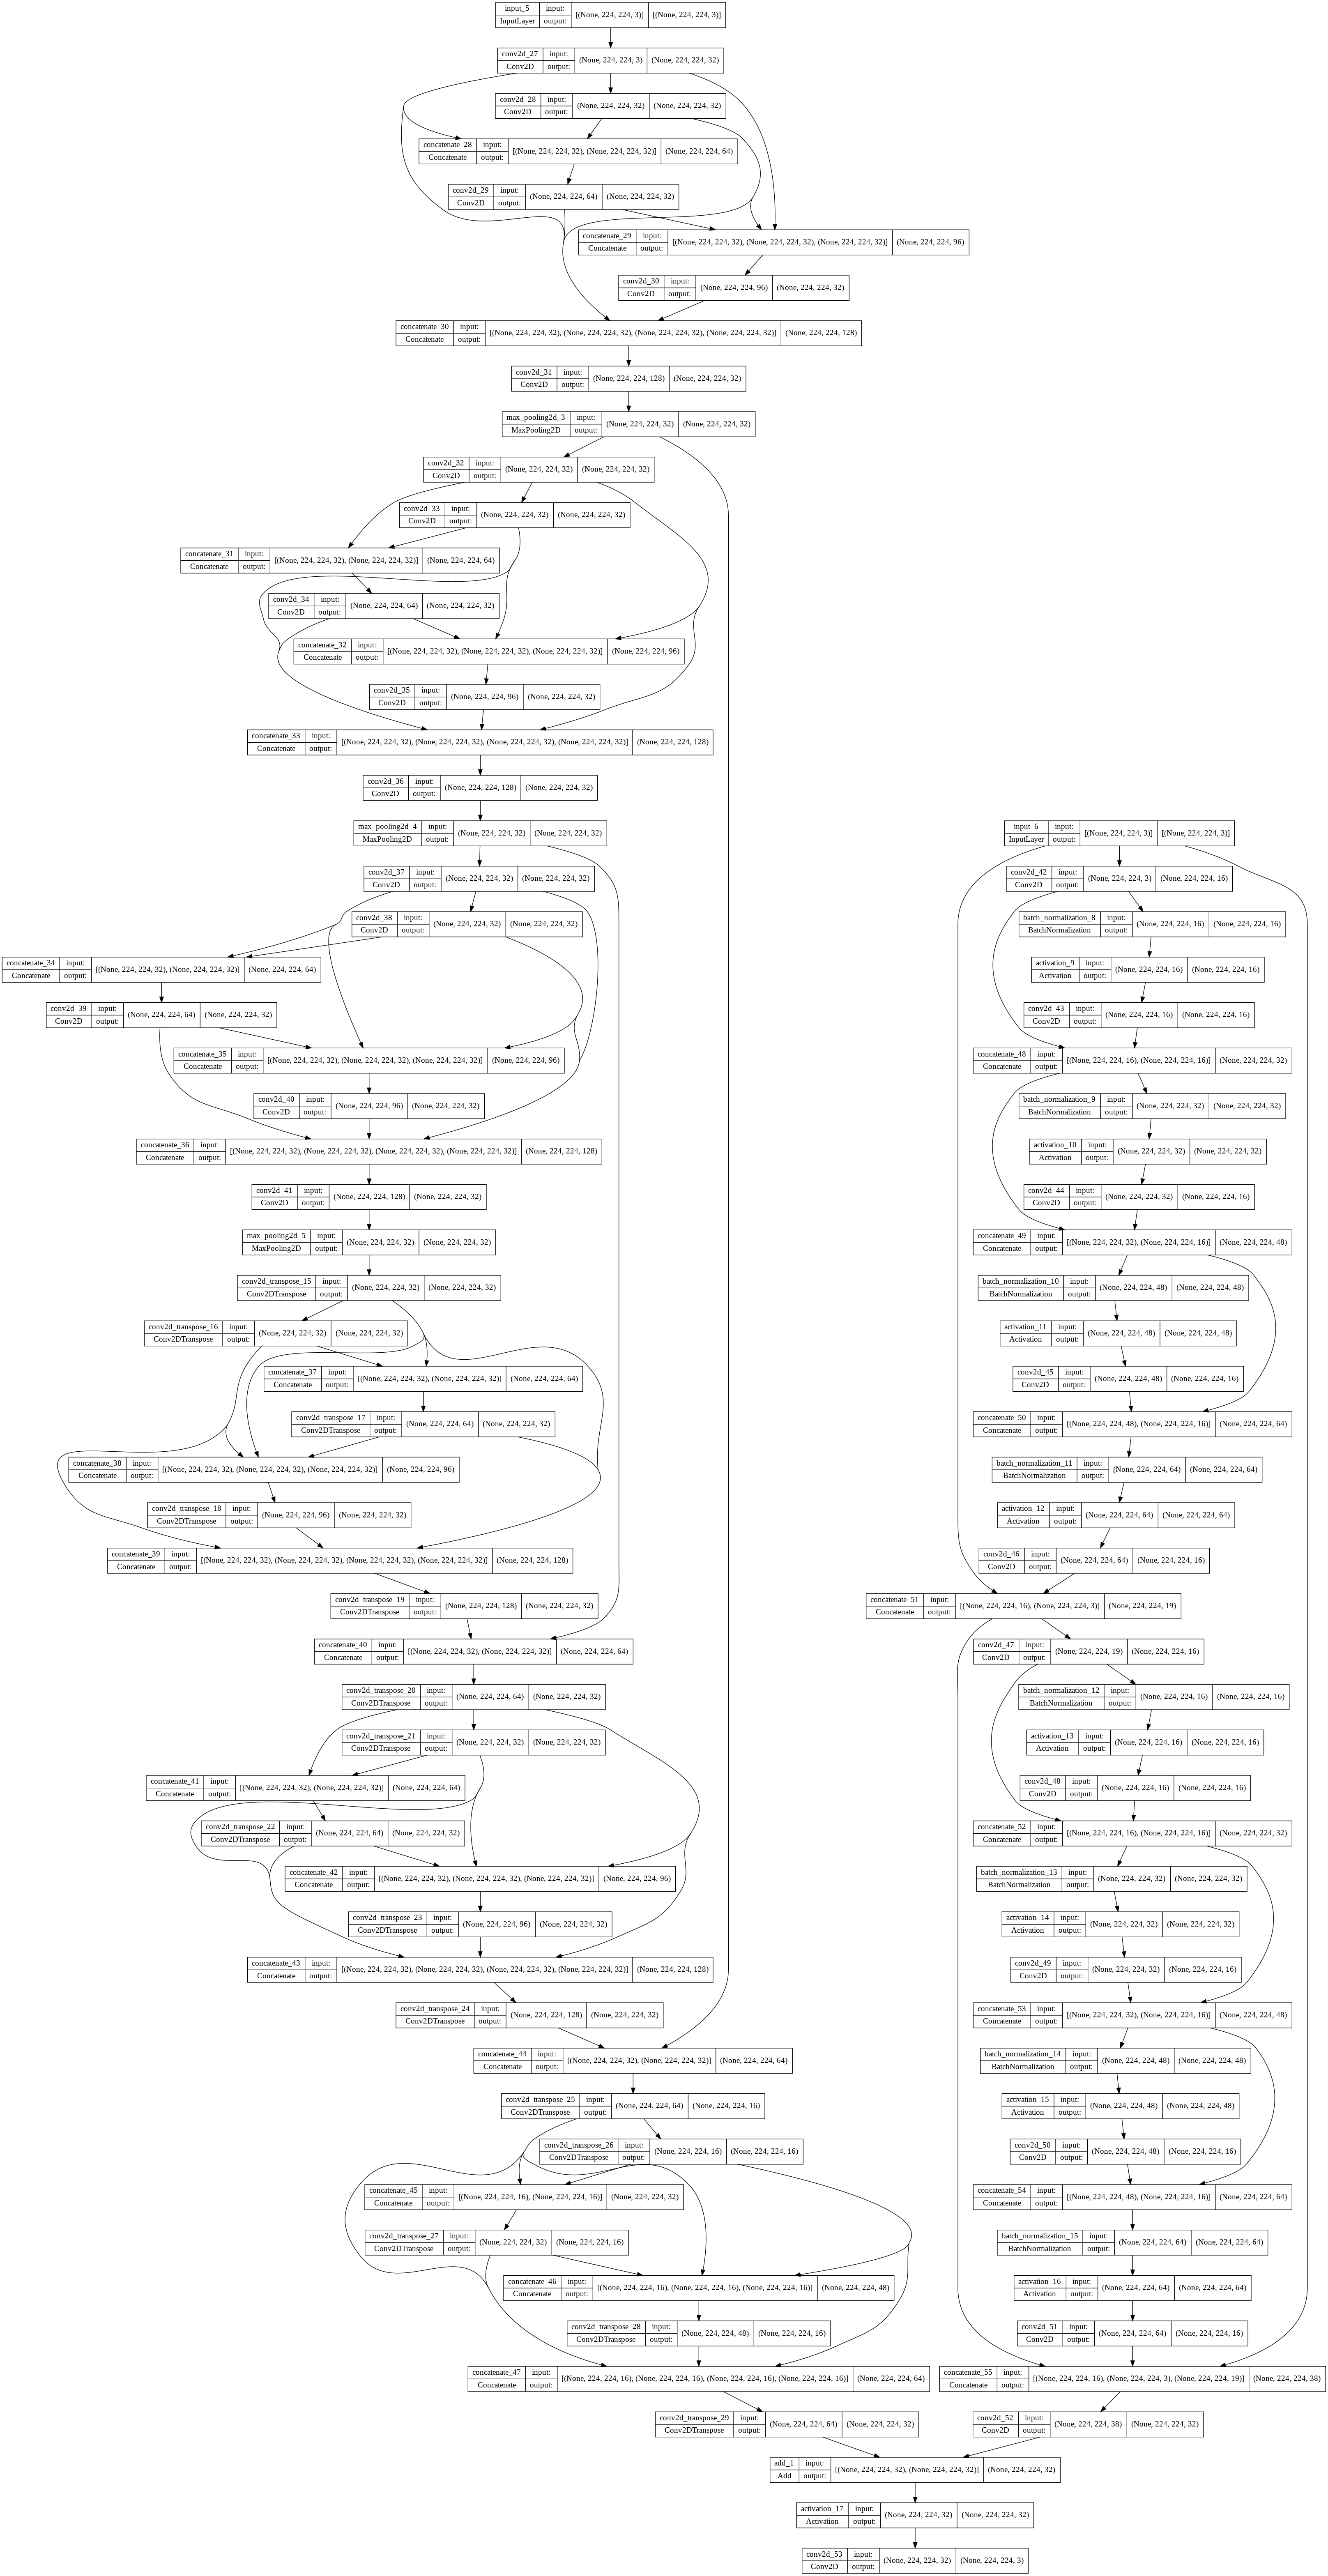

In [ ]:
input_sample = Input(shape=(224, 224, 3))
input_f_sample = Input(shape=(224, 224, 3))
output_ = cnn_model(input_sample, input_f_sample)
model_enhancer = Model(inputs=[input_sample, input_f_sample], outputs=output_)
model_enhancer.summary()
plot_model(model_enhancer, to_file='cnn_model.png', show_shapes=True, show_dtype=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,layer_range=None, show_layer_activations=False)

In [ ]:
d_path = '/content/drive/MyDrive/Derain/rain_drop_data/Data/train_data'
f_path = '/content/drive/MyDrive/Derain/rain_drop_data/Data/wmguided_train'
t_path = '/content/drive/MyDrive/Derain/rain_drop_data/Reference/train_ref'


data = []
f_data = []
target = []

im_h = 224
im_w = 224
for imagePath in os.listdir(d_path):

    # get full the path of the real, normalized and reference(target) images
    data_path = os.path.join(d_path, imagePath)
    f_data_path = os.path.join(f_path, imagePath)
    target_path = os.path.join(t_path, imagePath)
    
    #read the images
    img = cv2.imread(data_path)
    fimg = cv2.imread(f_data_path)
    target_img = cv2.imread(target_path)

    #resize the images into 112 x 112
    img = cv2.resize(img, (im_h, im_w))
    fimg = cv2.resize(fimg, (im_h, im_w))
    target_img = cv2.resize(target_img, (im_h, im_w))
        
    # change the images into array list
    data.append(img)
    f_data.append(fimg)
    target.append(target_img)

In [ ]:
# convert arrays into numpy arrays
data = np.array(data)
f_data = np.array(f_data)
target = np.array(target)
#print the shapes of images
print(data.shape, f_data.shape, target.shape)

(861, 224, 224, 3) (861, 224, 224, 3) (861, 224, 224, 3)


In [ ]:
# save the numpy arrays
np.save('data', data)
np.save('f_data', f_data)
np.save('target', target)

In [ ]:
# load the numpy arrays
data = np.load('data.npy')
f_data = np.load('f_data.npy')
target = np.load('target.npy')

#print the shapes of images
print(data.shape, f_data.shape, target.shape)

(861, 224, 224, 3) (861, 224, 224, 3) (861, 224, 224, 3)


In [ ]:
# initiate keras tensor input_sample, input_wb_sample, and output_
input_sample = Input(shape=(im_h, im_w, 3))
input_f_sample = Input(shape=(im_h, im_w, 3))
output_ = cnn_model(input_sample, input_f_sample)

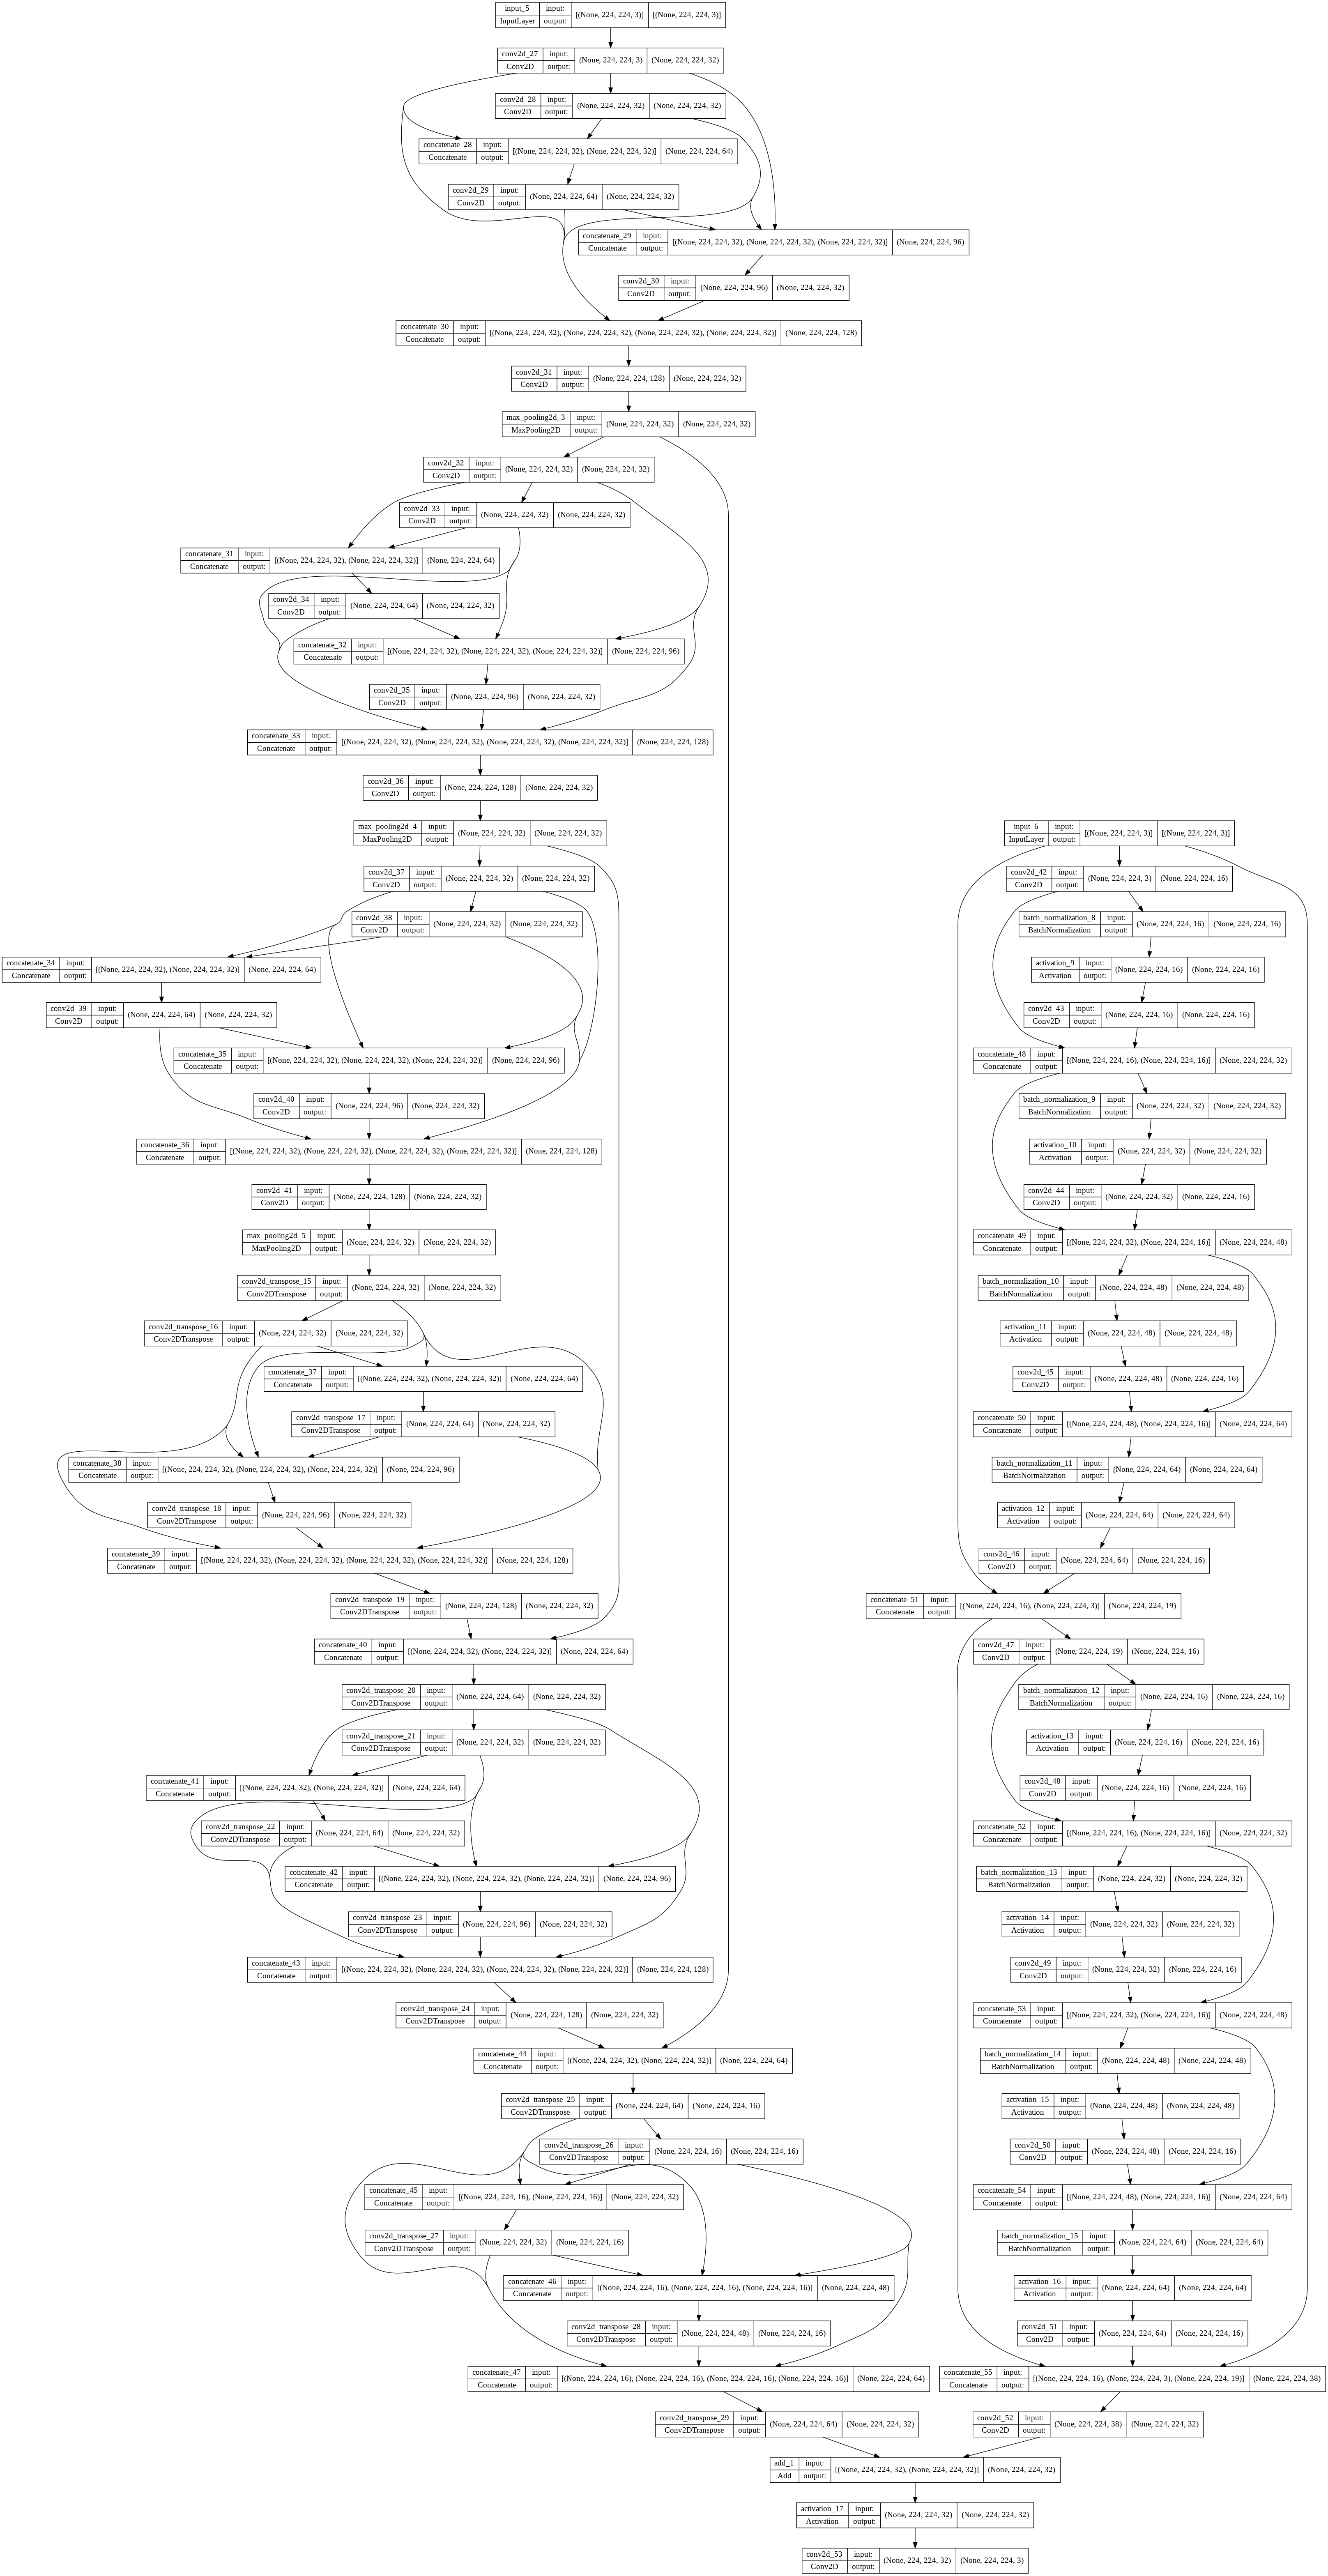

In [ ]:
# create the model in function way by specfying input and output
model_enhancer = Model(inputs=[input_sample, input_f_sample], outputs=output_)
plot_model(model_enhancer, to_file='cnn_model.png', show_shapes=True, show_dtype=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,layer_range=None, show_layer_activations=False)

In [ ]:
# Configures the model for training with loss function and optimizer
model_enhancer.compile(loss='mse', optimizer='adam', metrics=['mse', 'accuracy'])
model_enhancer.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_27 (Conv2D)             (None, 224, 224, 32  896         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_28 (Conv2D)             (None, 224, 224, 32  9248        ['conv2d_27[0][0]']              
                                )                                                           

In [ ]:
# split training dataset into 80% for training and 20% for validation

train_data, val_data,train_f_data, val_f_data, train_target, val_target = train_test_split(data,f_data, target,test_size=0.2)

print(len(train_data),  len(train_f_data), len(train_target), len(val_data), len(val_f_data), len(val_target))

688 688 688 173 173 173


In [ ]:
epoch = 100

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Derain/checkpoints/Try2/weights_best.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',mode='min', save_best_only=True, verbose=1)

In [ ]:
# train the model
history = model_enhancer.fit([train_data, train_f_data], train_target, validation_data=([val_data, val_f_data], val_target), batch_size=16, epochs=epoch, callbacks=[cp_callback], shuffle=True)


Epoch 1/100
43/43 [==============================] - ETA: 0s - loss: 55330.0977 - mse: 55330.1055 - accuracy: 0.3264
Epoch 1: val_loss improved from inf to 1553.56506, saving model to /content/drive/MyDrive/Derain/checkpoints/Try2/weights_best.hdf5
43/43 [==============================] - 59s 1s/step - loss: 55330.0977 - mse: 55330.1055 - accuracy: 0.3264 - val_loss: 1553.5651 - val_mse: 1553.5652 - val_accuracy: 0.3470
Epoch 2/100
43/43 [==============================] - ETA: 0s - loss: 1155.5762 - mse: 1155.5763 - accuracy: 0.4859
Epoch 2: val_loss improved from 1553.56506 to 983.55530, saving model to /content/drive/MyDrive/Derain/checkpoints/Try2/weights_best.hdf5
43/43 [==============================] - 56s 1s/step - loss: 1155.5762 - mse: 1155.5763 - accuracy: 0.4859 - val_loss: 983.5553 - val_mse: 983.5553 - val_accuracy: 0.5844
Epoch 3/100
43/43 [==============================] - ETA: 0s - loss: 912.2379 - mse: 912.2379 - accuracy: 0.6077
Epoch 3: val_loss improved from 983.555

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy'])


In [ ]:
# Evaluate the model on the test data
val_loss, val_mse, val_accuracy = model_enhancer.evaluate([val_data, val_f_data], val_target, verbose=2)

print("validation loss", val_loss)
print("MSE for validation:", val_mse)
print("validation accuracy:", val_accuracy)

6/6 - 4s - loss: 373.5836 - mse: 373.5836 - accuracy: 0.7416 - 4s/epoch - 704ms/step
validation loss 373.58355712890625
MSE for validation: 373.5835876464844
validation accuracy: 0.7415959239006042


In [ ]:
# initiate keras tensor input_sample, input_wb_sample, and output_
input_sample = Input(shape=(im_h, im_w, 3))
input_f_sample = Input(shape=(im_h, im_w, 3))
output_ = cnn_model(input_sample, input_f_sample)

In [ ]:
# create the model in function way by specfying input and output
model_enhancer_test = Model(inputs=[input_sample, input_f_sample], outputs=output_)

In [ ]:
# load weights
model_enhancer_test.load_weights("/content/drive/MyDrive/Derain/checkpoints/Try2/weights_best.hdf5")

In [ ]:
# Configures the model for training with loss function and optimizer
model_enhancer_test.compile(loss='mse', optimizer='adam', metrics=['mse', 'accuracy'])

In [ ]:
im_h = 224
im_w = 224

In [ ]:
#Path of testing images
test_path = '/content/drive/MyDrive/Derain/rain_drop_data/Data/test_data'
f_test_path = '/content/drive/MyDrive/Derain/rain_drop_data/Data/wmguided_test'
destination = '/content/drive/MyDrive/Derain/rain_drop_data/Outputs/Try3'


for test_img_name in os.listdir(test_path):

    #read the raw images
    test_img = cv2.imread(os.path.join(test_path, test_img_name))
    f_test_img = cv2.imread(os.path.join(f_test_path, test_img_name))
   
    #resize the images into 112 x 112
    test_img = cv2.resize(test_img, (im_h, im_w))
    f_test_img = cv2.resize(f_test_img, (im_h, im_w))
    
    # reshape the image (112, 112, 3) into (1, 112, 112, 3)
    test_img = test_img.reshape(1,im_h, im_w,3)
    f_test_img = f_test_img.reshape(1,im_h, im_w,3)

    # use model to do prediction
    result = model_enhancer_test.predict([test_img, f_test_img])
    
    result = result.squeeze()
    
    test_img = test_img.squeeze()
    
    test_img[:,:,:] = result[:,:,:]
    #Save the enhanced images
    cv2.imwrite(os.path.join(destination, test_img_name), test_img)

In [ ]:
target_path =  '/content/drive/MyDrive/Derain/rain_drop_data/Reference/test_ref'
predicted_path =  '/content/drive/MyDrive/Derain/rain_drop_data/Outputs/Try3'

target_data = []
predict_data = []

im_h = 224
im_w = 224
for image_name in os.listdir(target_path):

    #read the raw images
    target_img = cv2.imread(os.path.join(target_path, image_name))
    predicted_img = cv2.imread(os.path.join(predicted_path, image_name))
    

    #resize the images into 112 x 112
    target_img = cv2.resize(target_img, (im_h, im_w))
    predicted_img = cv2.resize(predicted_img, (im_h, im_w))
        
    # put the images into array list
    target_data.append(target_img)
    predict_data.append(predicted_img)

In [ ]:
#convert arrays into numpy arrays
target_data = np.array(target_data)
predict_data = np.array(predict_data) 

In [ ]:
print(target_data.shape, predict_data.shape)

(307, 224, 224, 3) (307, 224, 224, 3)


In [ ]:
# save the numpy arrays
np.save('target_data', target_data)
np.save('predict_data', predict_data)

In [ ]:
# load the numpy arrays
target_data = np.load('target_data.npy')
predict_data = np.load('predict_data.npy')

In [ ]:
print(target_data.shape, predict_data.shape)

(307, 224, 224, 3) (307, 224, 224, 3)


In [ ]:
##### FULL-REFERENCE IMAGE QUALITY ASSESSMENT IN TERMS OF MSE, PSNR, AND SSIM #######
#Mean squared error

def mean_squared_error(predict_data, target_data):
    MSE =  np.mean((predict_data - target_data) ** 2, dtype=np.float64)
    return MSE

Value_Mse = mean_squared_error(target_data, predict_data)
print("MSE for test data :",Value_Mse)  

MSE for test data : 48.591685670349165


In [ ]:
#Peak signal to noise ratio
from math import log10, sqrt

def PSNR(target_data, predict_data):
 mse =  np.mean((predict_data - target_data) ** 2, dtype=np.float64)
 if(mse == 0):
  return 100
 max_pixel = 255.0
 psnr = 10 * log10(np.square(max_pixel) / mse)
 return psnr 

value = PSNR(target_data, predict_data)
print("\nPeak Signal-to-Noise Ratio (PSNR) value is", value, "dB")


Peak Signal-to-Noise Ratio (PSNR) value is 31.265183956465847 dB


In [ ]:
#Structural similarity index

from skimage.metrics import structural_similarity as ssim
ssim_value = ssim(target_data, predict_data, multichannel=True)
print("SSIM:", ssim_value)

SSIM: 0.946864143952206
